In [112]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint as pp
from pylab import *

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load_pd = pd.read_csv(clinical_trial_data_to_load)

#print mouse_drug_data_to_load_pd
pp.pprint(len(mouse_drug_data_to_load_pd))
pp.pprint(mouse_drug_data_to_load_pd.head(1))

#print clinical_trial_data_to_load_pd
pp.pprint(len(clinical_trial_data_to_load_pd))
pp.pprint(clinical_trial_data_to_load_pd.head(1))


combinedDatapd = pd.merge(mouse_drug_data_to_load_pd, clinical_trial_data_to_load_pd, on='Mouse ID', how='outer')


#new data set size
pp.pprint(len(combinedDatapd))


# Display the data table for preview
# Combine the data into a single dataset
pp.pprint(combinedDatapd.head(1))

mouseCount = len(combinedDatapd['Mouse ID'].unique())

pp.pprint(mouseCount)

250
  Mouse ID      Drug
0     f234  Stelasyn
1893
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1906
  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0                45.0                 0
249


## Tumor Response to Treatment

In [113]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combinedDatapdTrial = combinedDatapd[['Drug','Timepoint','Tumor Volume (mm3)',]]

MeanTumorVolumeDataGroupedbyDrugandTimepoint  = combinedDatapdTrial.groupby(['Drug','Timepoint'], as_index=False).mean().groupby(['Drug','Timepoint'], as_index=False).apply(lambda x: x)

pp.pprint(MeanTumorVolumeDataGroupedbyDrugandTimepoint.head(20))
type(MeanTumorVolumeDataGroupedbyDrugandTimepoint)


         Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45           64.132421


pandas.core.frame.DataFrame

In [114]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
StandardErrorofTumorVolumesGroupedbyDrugandTimepoint  = combinedDatapdTrial.groupby(['Drug','Timepoint']).sem().reset_index()
# Convert to DataFrame
StandardErrorofTumorVolumesGroupedbyDrugandTimepoint.head(10)
# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [115]:
# Minor Data Munging to Re-Format the Data Frames

meanVolDataSet = MeanTumorVolumeDataGroupedbyDrugandTimepoint.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

meanVolDataSet


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


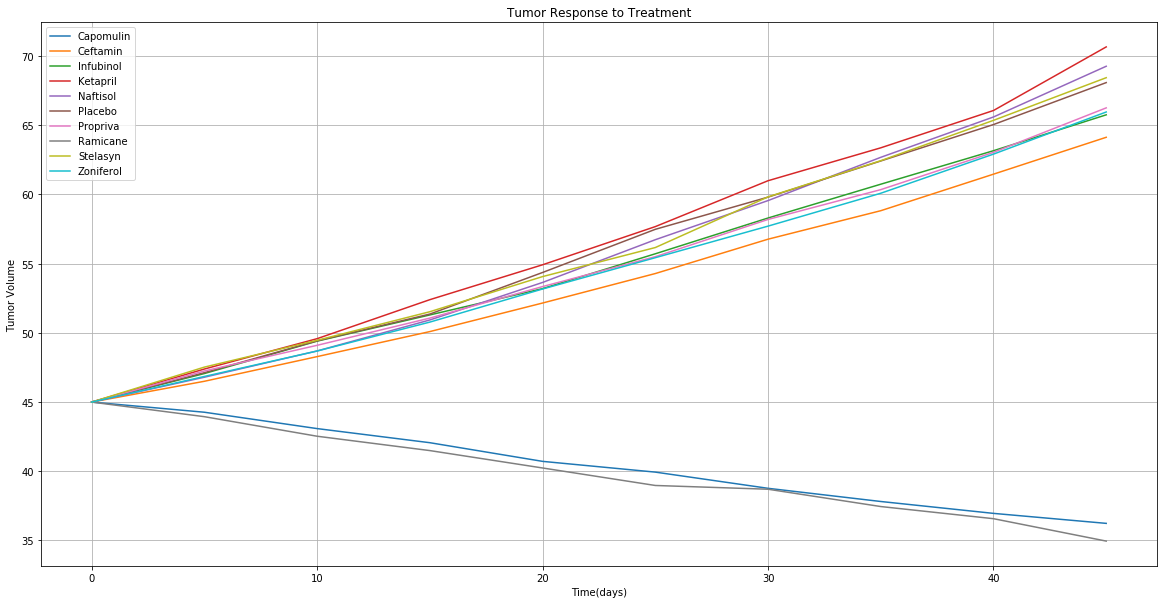

In [116]:
# Generate the Plot (with Error Bars)
fig = plt.figure(figsize=(20,10))
plt.xlabel('Time(days)')
plt.ylabel('Tumor Volume')
plt.title('Tumor Response to Treatment')
plt.grid(True);

plt.plot(meanVolDataSet);
plt.gca().legend(MeanTumorVolumeDataGroupedbyDrugandTimepoint['Drug'].unique(),loc='left');

# Save the Figure
#MeanTumorVolumeDataGroupedbyDrugandTimepointTransFormed.plot()

In [117]:
# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [118]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
localMetaStore = combinedDatapd[['Drug','Timepoint','Metastatic Sites']]
meanMetSiteGrouped  = localMetaStore.groupby(['Drug','Timepoint'], as_index=False).mean().groupby(['Drug','Timepoint'], as_index=False).apply(lambda x: x)

meanMetSiteGrouped.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [119]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

localMetaStore = combinedDatapd[['Drug','Timepoint','Metastatic Sites']]
metSiteGroupedError  = localMetaStore.groupby(['Drug','Timepoint']).sem().reset_index()
# Convert to DataFrame
metSiteGroupedError.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [120]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
meanMetSiteGroupedReformatted = meanMetSiteGrouped.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()
meanMetSiteGroupedReformatted.drop(meanMetSiteGroupedReformatted.columns[0], axis=1,inplace=True)

#meanMetSiteGroupedReformatted.drop(meanMetSiteGroupedReformatted.columns[1], axis=1,inplace=True)

pp.pprint(meanMetSiteGroupedReformatted.head(10))

pp.pprint("------")
metSiteGroupedErrorReformatted =  metSiteGroupedError.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()
metSiteGroupedErrorReformatted.drop(metSiteGroupedErrorReformatted.columns[0], axis=1,inplace=True)

pp.pprint(metSiteGroupedErrorReformatted.head(2))


Drug  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  Propriva  \
0      0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.160000  0.380952   0.280000  0.304348  0.260870  0.375000  0.320000   
2      0.320000  0.600000   0.666667  0.590909  0.523810  0.833333  0.565217   
3      0.375000  0.789474   0.904762  0.842105  0.857143  1.250000  0.764706   
4      0.652174  1.111111   1.050000  1.210526  1.150000  1.526316  1.000000   
5      0.818182  1.500000   1.277778  1.631579  1.500000  1.941176  1.357143   
6      1.090909  1.937500   1.588235  2.055556  2.066667  2.266667  1.615385   
7      1.181818  2.071429   1.666667  2.294118  2.266667  2.642857  2.300000   
8      1.380952  2.357143   2.100000  2.733333  2.466667  3.166667  2.777778   
9      1.476190  2.692308   2.111111  3.363636  2.538462  3.272727  2.571429   

Drug  Ramicane  Stelasyn  Zoniferol  
0     0.000000  0.000000   0.000000  
1     0.120000  0.240000   0.166667  
2    

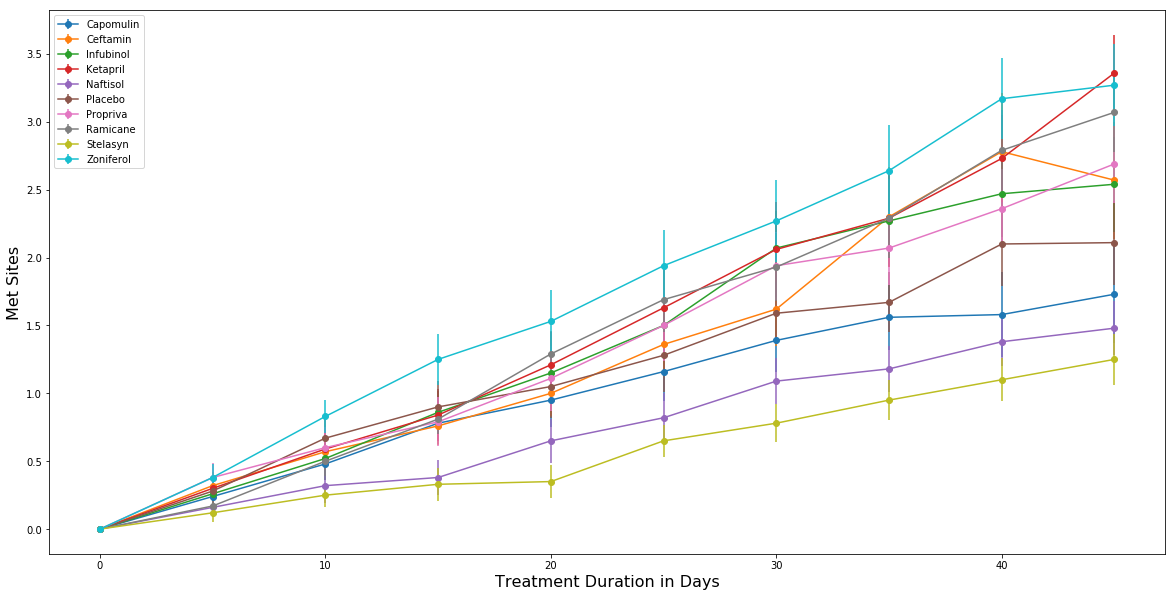

In [121]:
# Generate the Plot (with Error Bars)

# Save the Figure
# Show the Figure

drugsInList = combinedDatapd['Drug'].unique()

fig = plt.figure(figsize=(20,10))
x_axis = np.arange(0, 50, 5)

ax = fig.add_subplot(111)
ax.set_xlabel('Treatment Duration in Days', fontsize = 16)
ax.set_ylabel('Met Sites', fontsize = 16)

for drug in drugsInList:
    s = meanMetSiteGroupedReformatted[drug].apply(lambda x: float("{0:.2f}".format( float(x)))).values[:,]
    sx = metSiteGroupedErrorReformatted[drug].apply(lambda x: float("{0:.2f}".format(float(x)))).values[:,]
    ax.errorbar(x_axis, s,  sx, marker='o')
    
plt.gca().legend(MeanTumorVolumeDataGroupedbyDrugandTimepoint['Drug'].unique(),loc='left');

## Survival Rates

In [122]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

localMetaStore = combinedDatapd[['Drug','Timepoint','Mouse ID']]
countMiceCombination  = localMetaStore.groupby(['Drug','Timepoint'], as_index=False).count().groupby(['Drug','Timepoint'], as_index=False).apply(lambda x: x)

countMiceCombination.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [123]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
countMiceCombinationReformatted = countMiceCombination.pivot(index='Timepoint', columns='Drug', values='Mouse ID').reset_index()
countMiceCombinationReformatted.drop(countMiceCombinationReformatted.columns[0], axis=1,inplace=True)
countMiceCombinationReformatted

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,25,25,25,25,25,25,26,25,26,25
1,25,21,25,23,23,24,25,25,25,24
2,25,20,21,22,21,24,23,24,23,22
3,24,19,21,19,21,20,17,24,23,21
4,23,18,20,19,20,19,17,23,21,17
5,22,18,18,19,18,17,14,23,19,16
6,22,16,17,18,15,15,13,23,18,15
7,22,14,12,17,15,14,10,21,16,14
8,21,14,10,15,15,12,9,20,12,14
9,21,13,9,11,13,11,7,20,11,14


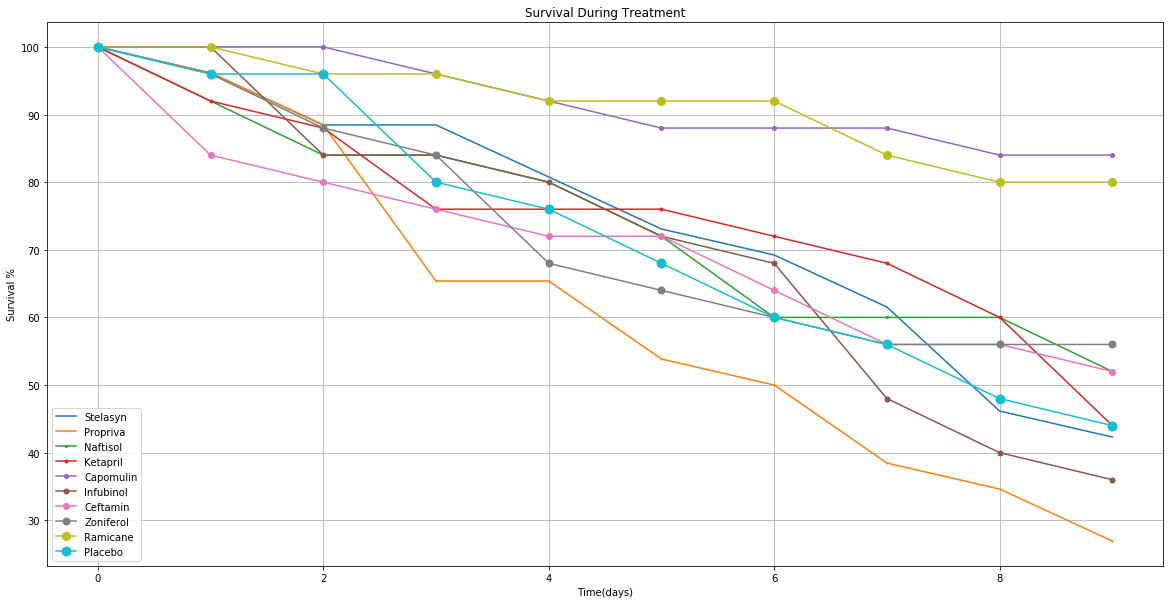

In [124]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure

fig2 = plt.figure(figsize=(20,10))
plt.xlabel('Time(days)')
plt.ylabel('Survival %')
plt.title('Survival During Treatment')
plt.grid(True);
intMarker = 0
for drug in drugsInList:
    max = countMiceCombinationReformatted[drug][0]
    plt.plot(countMiceCombinationReformatted[drug].apply(lambda x: (x*100)/max ),marker='o', markersize=intMarker*0.5)
    intMarker = intMarker+2
plt.gca().legend(drugsInList,loc='left');

## Summary Bar Graph

In [140]:
# Calculate the percent changes for each drug

# Display the data to confirm
dataToPercentage = {}
xvalues=[]
yvalues=[]
for drug in drugsInList:
    first = meanVolDataSet[drug][0]
    last = meanVolDataSet[drug][45]
    changePercent = ( last -first)*100/first
    dataToPercentage[drug] = changePercent
    xvalues.append( drug )
    yvalues.append(changePercent)
pp.pprint(dataToPercentage)
#sorted_by_dataToPercentage = sorted(dataToPercentage.items(), key=lambda kv: kv[1])
sorted_by_dataToPercentage = dict(sorted(dataToPercentage.items(), key=lambda k: k[1]))
type(sorted_by_dataToPercentage)
type(sorted_by_dataToPercentage.values())



{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.51649185589744,
 'Infubinol': 46.12347172785188,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320637,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.08513428789903,
 'Zoniferol': 46.57975086509525}


dict_values

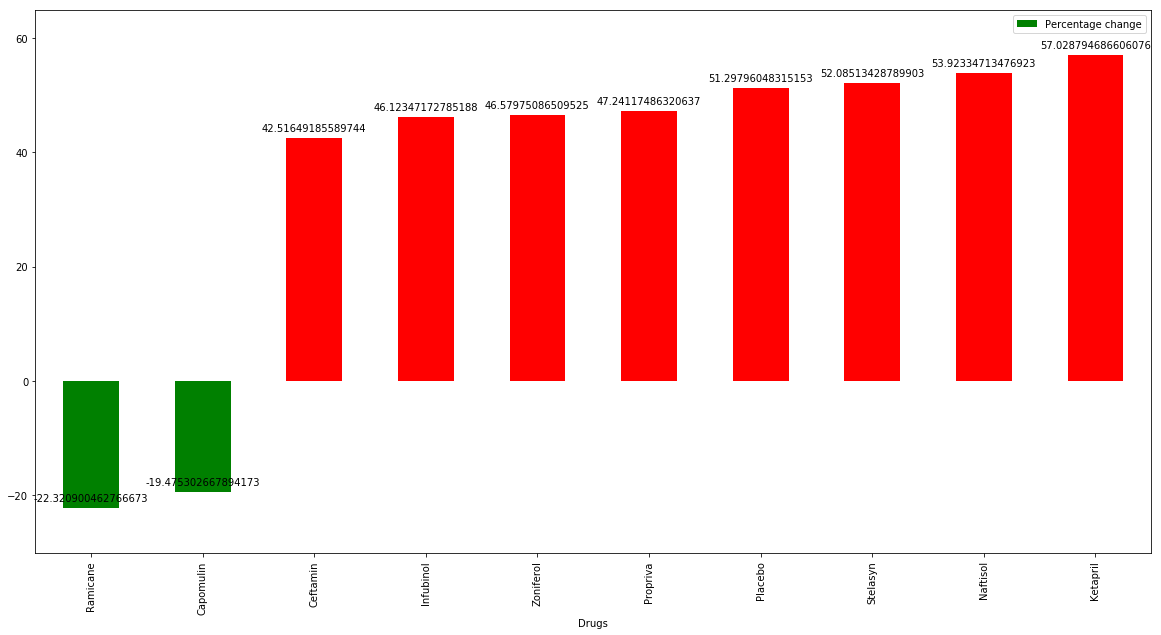

In [155]:
# Store all Relevant Percent Changes into a Tuple
"""
def if_this_else_that(x, yes_color, no_color):
    if x > 0:
        res = yes_color
    else: 
        res = no_color
    return(res)

fig3 = plt.figure(figsize=(20,10))

tupleForData = zip(dataToPercentage.keys(), dataToPercentage.values())

# Splice the data between passing and failing drugs

pp.pprint(tupleForData)
# Orient widths. Add labels, tick marks, etc. 

plt.bar(sorted_by_dataToPercentage.keys(),sorted_by_dataToPercentage.values(), 
        align='center',label=sorted_by_dataToPercentage.values(),
        color=[if_this_else_that(item,"red","green") for item in list(sorted_by_dataToPercentage.values())] )
        
plt.ylabel('Percentage change')
plt.title('Tumor change over 45 days')
"""
def if_this_else_that(x, yes_color, no_color):
    if x > 0:
        res = yes_color
    else: 
        res = no_color
    return(res)

# Use functions to label the percentages of changes


# Call functions to implement the function calls
df = pd.DataFrame({'Drugs': list(sorted_by_dataToPercentage.keys()),
               'Percentage change': list(sorted_by_dataToPercentage.values())})

ax = df.plot(x = "Drugs", y="Percentage change", 
             kind='bar',figsize=(20,10),color=[if_this_else_that(item,"red","green") for item in list(sorted_by_dataToPercentage.values())])

def autolabel(s, ax=None, name=""):
    x = s.name
    y = s[name]
    ax.annotate("{}".format(y), (x,y), xytext=(0,5), textcoords="offset points",
                ha='center', va='bottom')

df.apply(autolabel, axis=1, ax=ax, name="Percentage change")

ax.margins(y=0.1)
plt.show()

# Save the Figure


# Show the Figure
